In [3]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from datetime import datetime
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Load and prepare data (same as your RF code)
# --- 1. Load Feature Names ---
try:
    features_df = pd.read_csv('UCI HAR Dataset/features.txt', delim_whitespace=True, header=None)
    feature_names = features_df[1].tolist()
except FileNotFoundError:
    print("Error: 'features.txt' not found. Make sure it's in the 'UCI HAR Dataset' folder.")
    feature_names = []

# --- 2. Load Training Data (X_train) ---
X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)

# Set the column names
if feature_names:
    X_train.columns = feature_names
else:
    print("Warning: Feature names not loaded. Columns will be numbered.")

# --- 3. Load Subject Data ---
subject_series = pd.read_csv('UCI HAR Dataset/train/subject_train.txt', header=None)[0]

# --- 4. Load Activity Labels (y_train) ---
y_train_series = pd.read_csv('UCI HAR Dataset/train/y_train.txt', header=None, names=['Activity'])['Activity']

# --- 5. Combine All Data into One DataFrame ---
train = X_train.copy()

# Add the new columns
train['subject'] = subject_series
train['Activity'] = y_train_series

# --- 6. Map Activity Names ---
activity_map = {
    1: 'WALKING', 
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING', 
    5: 'STANDING',
    6: 'LAYING'
}

train['ActivityName'] = train['Activity'].map(activity_map)

# --- Load Test Data ---
X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)

# Set the column names
if 'feature_names' in locals():
    X_test.columns = feature_names
else:
    print("Warning: 'feature_names' not found. Columns will be numbered.")

# Load Subject Data for test
subject_series_test = pd.read_csv('UCI HAR Dataset/test/subject_test.txt', header=None)[0]

# Load Activity Labels for test
y_test_series = pd.read_csv('UCI HAR Dataset/test/y_test.txt', header=None, names=['Activity'])['Activity']

# Combine All Test Data into One DataFrame
test = X_test.copy()

# Add the new columns
test['subject'] = subject_series_test
test['Activity'] = y_test_series
test['ActivityName'] = test['Activity'].map(activity_map)

# Prepare features and labels for modeling
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

# Labels that are useful in plotting confusion matrix
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

# Confusion matrix plotting function 
plt.rcParams["font.family"] = 'DejaVu Sans'




C:\Users\new user\AppData\Local\Temp\ipykernel_7920\308284994.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features_df = pd.read_csv('UCI HAR Dataset/features.txt', delim_whitespace=True, header=None)
C:\Users\new user\AppData\Local\Temp\ipykernel_7920\308284994.py:25: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
C:\Users\new user\AppData\Local\Temp\ipykernel_7920\308284994.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)


X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


Running GridSearchCV for KNN without Dimensionality Reduction...
Training the KNN (No DR) model..
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Done....!

==> Training time:- 0:00:13.235405

Predicting test data
Done....!

==> Testing time:- 0:00:01.027732

==> Accuracy:- 0.9141499830335935


 ********Confusion Matrix********

 [[530   6   1   0   0   0]
 [  1 404  85   0   0   1]
 [  0  18 514   0   0   0]
 [  0   0   0 489   4   3]
 [  0   0   0  42 322  56]
 [  0   0   0  35   1 435]]


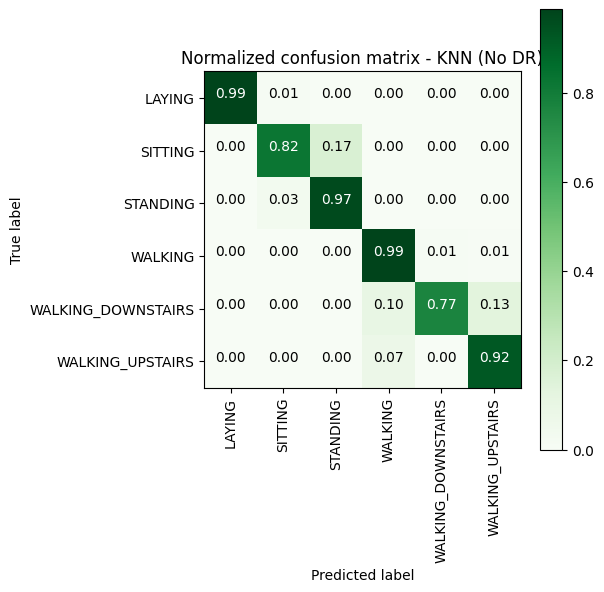

****************| Classification Report - KNN (No DR) |****************
                    precision    recall  f1-score   support

            LAYING       1.00      0.99      0.99       537
           SITTING       0.94      0.82      0.88       491
          STANDING       0.86      0.97      0.91       532
           WALKING       0.86      0.99      0.92       496
WALKING_DOWNSTAIRS       0.98      0.77      0.86       420
  WALKING_UPSTAIRS       0.88      0.92      0.90       471

          accuracy                           0.91      2947
         macro avg       0.92      0.91      0.91      2947
      weighted avg       0.92      0.91      0.91      2947



==> Best Estimator:
	Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=11,
                                      weights='distance'))])


==> Best parameters:
	Parameters of best estimator : {'model__metric': 'manhattan', 'model__n

C:\Users\new user\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [0.85310275 0.85446301 0.86344    0.86411993 0.86888112 0.86874501
 0.87010516 0.86996916 0.87024133 0.87105738        nan 0.85378119
        nan 0.85990258        nan 0.86806479        nan 0.87132871
        nan 0.87105666]
  warnings.warn(


Done....!

==> Training time:- 0:00:07.236318

Predicting test data
Done....!

==> Testing time:- 0:00:00.193454

==> Accuracy:- 0.8737699355276553


 ********Confusion Matrix********

 [[503  17  17   0   0   0]
 [  2 353 134   0   0   2]
 [  0  30 502   0   0   0]
 [  0   0   0 490   5   1]
 [  0   0   0  61 300  59]
 [  0   0   0  39   5 427]]


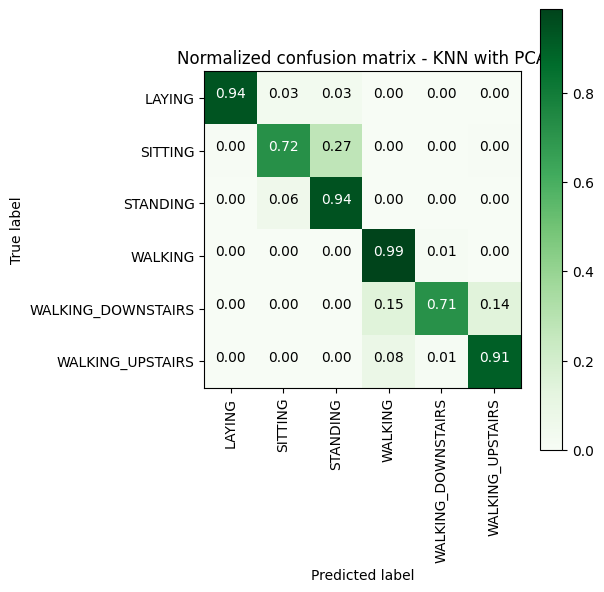

****************| Classification Report - KNN with PCA |****************
                    precision    recall  f1-score   support

            LAYING       1.00      0.94      0.97       537
           SITTING       0.88      0.72      0.79       491
          STANDING       0.77      0.94      0.85       532
           WALKING       0.83      0.99      0.90       496
WALKING_DOWNSTAIRS       0.97      0.71      0.82       420
  WALKING_UPSTAIRS       0.87      0.91      0.89       471

          accuracy                           0.87      2947
         macro avg       0.89      0.87      0.87      2947
      weighted avg       0.88      0.87      0.87      2947



==> Best Estimator:
	Pipeline(steps=[('scaler', StandardScaler()),
                ('dim_red', PCA(n_components=0.95)),
                ('model',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=9,
                                      weights='distance'))])


==> Best parameters:
	Parameters of best

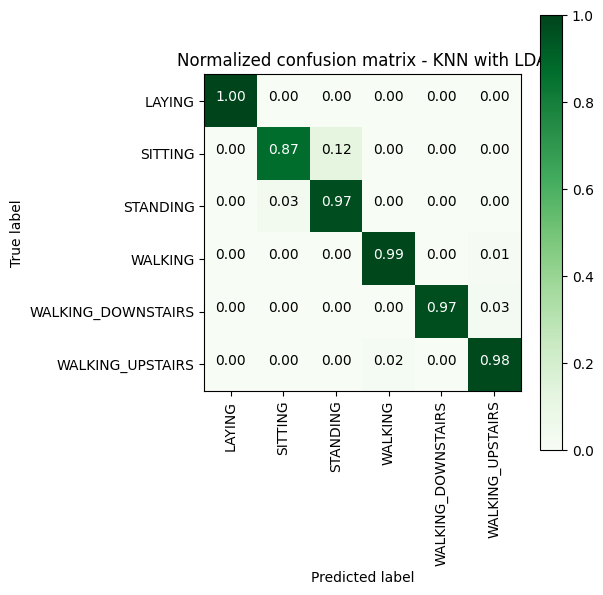

****************| Classification Report - KNN with LDA |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.87      0.91       491
          STANDING       0.89      0.97      0.93       532
           WALKING       0.98      0.99      0.98       496
WALKING_DOWNSTAIRS       1.00      0.97      0.99       420
  WALKING_UPSTAIRS       0.96      0.98      0.97       471

          accuracy                           0.96      2947
         macro avg       0.97      0.96      0.96      2947
      weighted avg       0.97      0.96      0.96      2947



==> Best Estimator:
	Pipeline(steps=[('scaler', StandardScaler()),
                ('dim_red', LinearDiscriminantAnalysis(n_components=5)),
                ('model',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=9,
                                      weights='distance'))])


==> Best parameters:

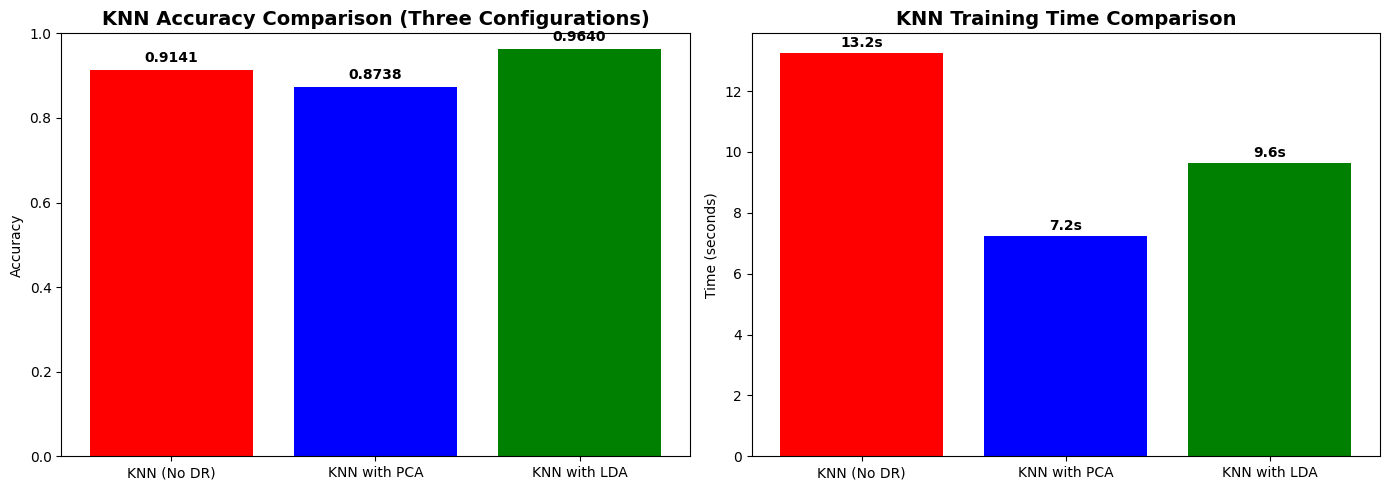


DETAILED THREE-WAY KNN COMPARISON
Model           | Accuracy | Training Time | Best Parameters
--------------------------------------------------------------------------------
KNN (No DR)     | 0.9141   | 13.2        s | k=11, weights=distance, metric=manhattan
KNN + PCA       | 0.8738   | 7.2         s | k=9, weights=distance, metric=manhattan
KNN + LDA       | 0.9640   | 9.6         s | k=9, weights=distance, metric=manhattan

🏆 Best performing KNN model: KNN with LDA (Accuracy: 0.9640)

THREE-WAY CONFUSION MATRIX COMPARISON - KNN MODELS


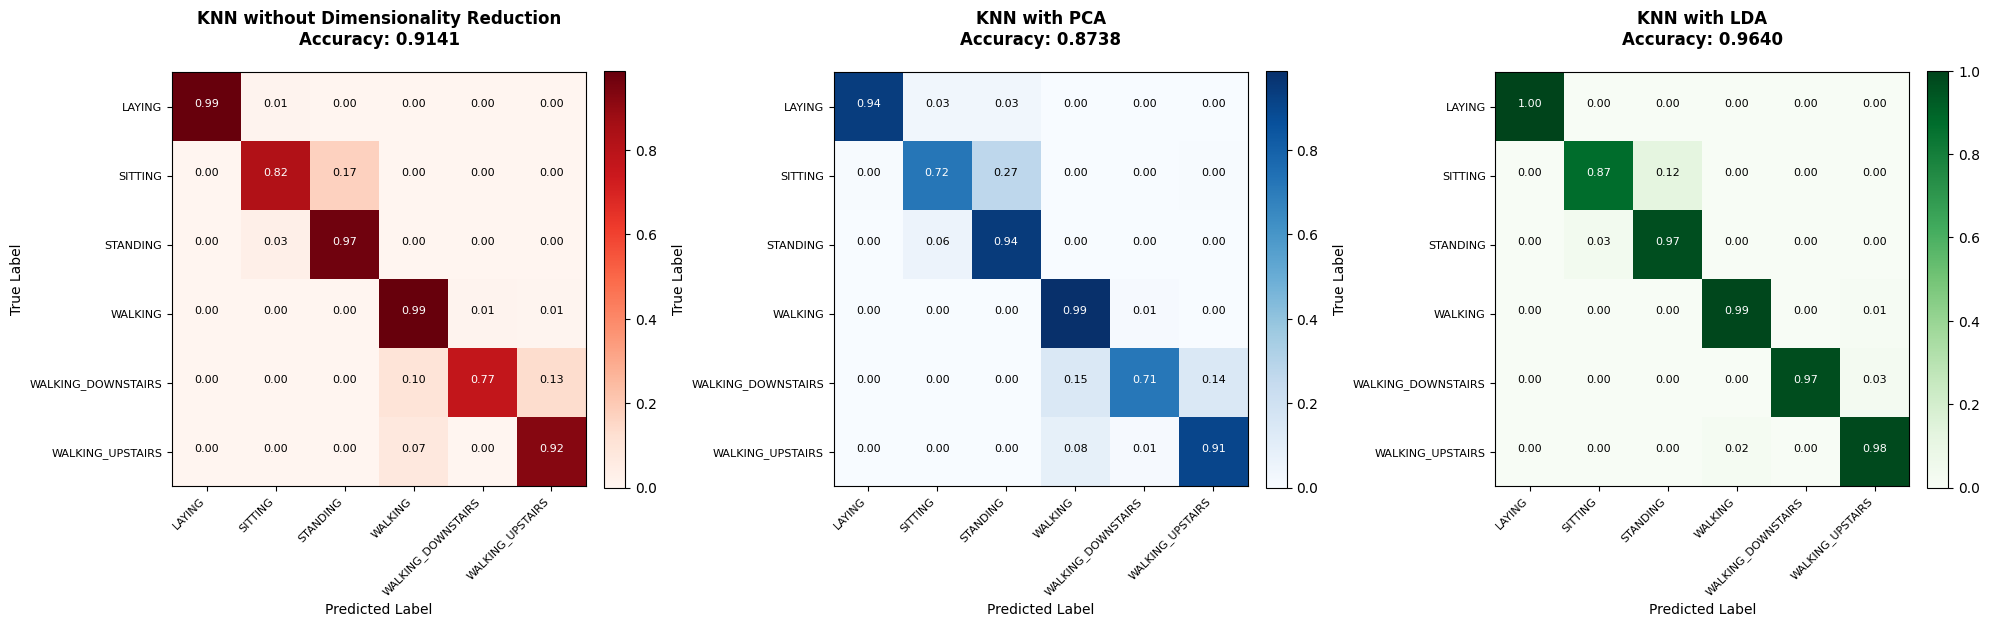


COMPREHENSIVE PERFORMANCE ANALYSIS
Performance improvements relative to KNN without dimensionality reduction:
  • KNN with PCA:  -0.0404 (-4.04%)
  • KNN with LDA:  +0.0499 (+4.99%)

Training efficiency:
  • Fastest model: KNN with PCA (7.2s)

FINAL COMPREHENSIVE RECOMMENDATION
🏆 STRONGLY RECOMMEND: KNN with Linear Discriminant Analysis (LDA)
   • Highest accuracy: 0.9640
   • Significant improvement over baseline: +4.99%
   • Comparable or faster training time


In [4]:


# --- KNN Implementation ---

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
    
# Grid search attributes function (same as your RF code)
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('\n\n==> Best Estimator:')
    print('\t{}\n'.format(model.best_estimator_))

    # parameters that gave best results while performing grid search
    print('\n==> Best parameters:')
    print('\tParameters of best estimator : {}'.format(model.best_params_))

    # number of cross validation splits
    print('\n==> No. of CrossValidation sets:')
    print('\tTotal number of cross validation sets: {}'.format(model.n_splits_))

    # Average cross validated score of the best estimator, from the Grid Search 
    print('\n==> Best Score:')
    print('\tAverage Cross Validate scores of best estimator : {}'.format(model.best_score_))


def perform_knn_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, 
                     print_cm=True, cm_cmap=plt.cm.Greens, model_name="KNN"):
    """
    Perform KNN model training and evaluation
    """
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print(f'Training the {model_name} model..')
    model.fit(X_train, y_train)
    print('Done....!\n')
    train_end_time = datetime.now()
    results['training_time'] = train_end_time - train_start_time
    print('==> Training time:- {}\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done....!\n')
    results['testing_time'] = test_end_time - test_start_time
    print('==> Testing time:- {}\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracy of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('==> Accuracy:- {}\n'.format(accuracy))
   
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('\n ********Confusion Matrix********')
        print('\n {}'.format(cm))
        
    # plot confusion matrix
    plt.figure(figsize=(6,6))
    plt.grid(False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, 
                         title=f'Normalized confusion matrix - {model_name}', cmap=cm_cmap)
    plt.show()
    
    # get classification report
    print(f'****************| Classification Report - {model_name} |****************')
    classification_report = metrics.classification_report(y_test, y_pred)
   
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained model to the results
    results['model'] = model
    results['model_name'] = model_name
    
    return results

# Define KNN parameters for grid search
knn_parameters = {
    'model__n_neighbors': [3, 5, 7, 9, 11],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan']
}

# --- KNN without Dimensionality Reduction ---
print("Running GridSearchCV for KNN without Dimensionality Reduction...")

# Create simple KNN pipeline (just scaler + KNN)
simple_knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())
])

# Setup GridSearchCV for simple KNN
knn_grid_simple = GridSearchCV(
    simple_knn_pipeline,
    param_grid=knn_parameters,
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Run simple KNN model
knn_grid_simple_results = perform_knn_model(
    knn_grid_simple, 
    X_train, y_train, X_test, y_test, 
    class_labels=labels,
    model_name="KNN (No DR)"
)

print_grid_search_attributes(knn_grid_simple_results['model'])

# --- KNN with PCA ---
print("\nRunning GridSearchCV for PCA + KNN...")

# Create PCA pipeline for KNN
pca_knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dim_red', PCA(n_components=0.95)),
    ('model', KNeighborsClassifier())
])

# Setup GridSearchCV for KNN with PCA
knn_grid_pca = GridSearchCV(
    pca_knn_pipeline,
    param_grid=knn_parameters,
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Run KNN model with PCA
knn_grid_pca_results = perform_knn_model(
    knn_grid_pca, 
    X_train, y_train, X_test, y_test, 
    class_labels=labels,
    model_name="KNN with PCA"
)

print_grid_search_attributes(knn_grid_pca_results['model'])

# --- KNN with LDA ---
print("\nRunning GridSearchCV for LDA + KNN...")

# Create LDA pipeline for KNN
lda_knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dim_red', LDA(n_components=5)),  # LDA for dimensionality reduction
    ('model', KNeighborsClassifier())
])

# Setup GridSearchCV for LDA + KNN
knn_grid_lda = GridSearchCV(
    lda_knn_pipeline,
    param_grid=knn_parameters,
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Run LDA + KNN model
knn_grid_lda_results = perform_knn_model(
    knn_grid_lda, 
    X_train, y_train, X_test, y_test, 
    class_labels=labels,
    model_name="KNN with LDA"
)

print_grid_search_attributes(knn_grid_lda_results['model'])

# --- Three-Way KNN Comparison ---
print("\n" + "="*60)
print("THREE-WAY KNN MODEL COMPARISON")
print("="*60)
print(f"KNN without DR:  {knn_grid_simple_results['accuracy']:.4f}")
print(f"KNN with PCA:    {knn_grid_pca_results['accuracy']:.4f}")
print(f"KNN with LDA:    {knn_grid_lda_results['accuracy']:.4f}")

# Extract best parameters for comparison
simple_best_params = knn_grid_simple_results['model'].best_params_
pca_best_params = knn_grid_pca_results['model'].best_params_
lda_best_params = knn_grid_lda_results['model'].best_params_

print("\nBest Parameters:")
print(f"KNN without DR: {simple_best_params}")
print(f"PCA + KNN:      {pca_best_params}")
print(f"LDA + KNN:      {lda_best_params}")

# --- Three-Way KNN Comparison Visualization ---
knn_models = ['KNN (No DR)', 'KNN with PCA', 'KNN with LDA']
knn_accuracies = [
    knn_grid_simple_results['accuracy'],
    knn_grid_pca_results['accuracy'],
    knn_grid_lda_results['accuracy']
]

knn_training_times = [
    knn_grid_simple_results['training_time'].total_seconds(),
    knn_grid_pca_results['training_time'].total_seconds(),
    knn_grid_lda_results['training_time'].total_seconds()
]

# Create comparison plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy comparison
colors = ['red', 'blue', 'green']
bars1 = ax1.bar(knn_models, knn_accuracies, color=colors)
ax1.set_title('KNN Accuracy Comparison (Three Configurations)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0, 1)
for bar, acc in zip(bars1, knn_accuracies):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')

# Training time comparison  
bars2 = ax2.bar(knn_models, knn_training_times, color=colors)
ax2.set_title('KNN Training Time Comparison', fontsize=14, fontweight='bold')
ax2.set_ylabel('Time (seconds)')
for bar, time in zip(bars2, knn_training_times):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{time:.1f}s', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Detailed comparison
print("\n" + "="*80)
print("DETAILED THREE-WAY KNN COMPARISON")
print("="*80)
print(f"{'Model':<15} | {'Accuracy':<8} | {'Training Time':<12} | Best Parameters")
print("-" * 80)

simple_params_str = f"k={simple_best_params['model__n_neighbors']}, weights={simple_best_params['model__weights']}, metric={simple_best_params['model__metric']}"
pca_params_str = f"k={pca_best_params['model__n_neighbors']}, weights={pca_best_params['model__weights']}, metric={pca_best_params['model__metric']}"
lda_params_str = f"k={lda_best_params['model__n_neighbors']}, weights={lda_best_params['model__weights']}, metric={lda_best_params['model__metric']}"

print(f"{'KNN (No DR)':<15} | {knn_accuracies[0]:<8.4f} | {knn_training_times[0]:<12.1f}s | {simple_params_str}")
print(f"{'KNN + PCA':<15} | {knn_accuracies[1]:<8.4f} | {knn_training_times[1]:<12.1f}s | {pca_params_str}")
print(f"{'KNN + LDA':<15} | {knn_accuracies[2]:<8.4f} | {knn_training_times[2]:<12.1f}s | {lda_params_str}")

# Determine winner
best_accuracy = max(knn_accuracies)
best_model_index = knn_accuracies.index(best_accuracy)
winner = knn_models[best_model_index]

print(f"\n🏆 Best performing KNN model: {winner} (Accuracy: {best_accuracy:.4f})")
print("="*80)

# --- Three-Way Confusion Matrix Comparison ---
print("\n" + "="*80)
print("THREE-WAY CONFUSION MATRIX COMPARISON - KNN MODELS")
print("="*80)

# Get confusion matrices
cm_simple = knn_grid_simple_results['confusion_matrix']
cm_pca = knn_grid_pca_results['confusion_matrix']
cm_lda = knn_grid_lda_results['confusion_matrix']

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Normalize confusion matrices
cm_simple_normalized = cm_simple.astype('float') / cm_simple.sum(axis=1)[:, np.newaxis]
cm_pca_normalized = cm_pca.astype('float') / cm_pca.sum(axis=1)[:, np.newaxis]
cm_lda_normalized = cm_lda.astype('float') / cm_lda.sum(axis=1)[:, np.newaxis]

# Plot Simple KNN Confusion Matrix
im1 = ax1.imshow(cm_simple_normalized, interpolation='nearest', cmap=plt.cm.Reds)
ax1.set_title('KNN without Dimensionality Reduction\nAccuracy: {:.4f}'.format(knn_grid_simple_results['accuracy']), 
              fontsize=12, fontweight='bold', pad=20)
ax1.set_xlabel('Predicted Label', fontsize=10)
ax1.set_ylabel('True Label', fontsize=10)
tick_marks = np.arange(len(labels))
ax1.set_xticks(tick_marks)
ax1.set_yticks(tick_marks)
ax1.set_xticklabels(labels, rotation=45, ha='right', fontsize=8)
ax1.set_yticklabels(labels, fontsize=8)

# Plot PCA KNN Confusion Matrix
im2 = ax2.imshow(cm_pca_normalized, interpolation='nearest', cmap=plt.cm.Blues)
ax2.set_title('KNN with PCA\nAccuracy: {:.4f}'.format(knn_grid_pca_results['accuracy']), 
              fontsize=12, fontweight='bold', pad=20)
ax2.set_xlabel('Predicted Label', fontsize=10)
ax2.set_ylabel('True Label', fontsize=10)
ax2.set_xticks(tick_marks)
ax2.set_yticks(tick_marks)
ax2.set_xticklabels(labels, rotation=45, ha='right', fontsize=8)
ax2.set_yticklabels(labels, fontsize=8)

# Plot LDA KNN Confusion Matrix
im3 = ax3.imshow(cm_lda_normalized, interpolation='nearest', cmap=plt.cm.Greens)
ax3.set_title('KNN with LDA\nAccuracy: {:.4f}'.format(knn_grid_lda_results['accuracy']), 
              fontsize=12, fontweight='bold', pad=20)
ax3.set_xlabel('Predicted Label', fontsize=10)
ax3.set_ylabel('True Label', fontsize=10)
ax3.set_xticks(tick_marks)
ax3.set_yticks(tick_marks)
ax3.set_xticklabels(labels, rotation=45, ha='right', fontsize=8)
ax3.set_yticklabels(labels, fontsize=8)

# Add text annotations for all matrices
for ax, cm_norm in zip([ax1, ax2, ax3], [cm_simple_normalized, cm_pca_normalized, cm_lda_normalized]):
    thresh = cm_norm.max() / 2.
    for i, j in itertools.product(range(cm_norm.shape[0]), range(cm_norm.shape[1])):
        ax.text(j, i, format(cm_norm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm_norm[i, j] > thresh else "black",
                 fontsize=8)

# Add colorbars
plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
plt.colorbar(im3, ax=ax3, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

# --- Comprehensive Performance Analysis ---
print("\n" + "="*80)
print("COMPREHENSIVE PERFORMANCE ANALYSIS")
print("="*80)

# Calculate improvements relative to baseline (no DR)
baseline_accuracy = knn_grid_simple_results['accuracy']
pca_improvement = knn_grid_pca_results['accuracy'] - baseline_accuracy
lda_improvement = knn_grid_lda_results['accuracy'] - baseline_accuracy

print(f"Performance improvements relative to KNN without dimensionality reduction:")
print(f"  • KNN with PCA:  {pca_improvement:+.4f} ({pca_improvement*100:+.2f}%)")
print(f"  • KNN with LDA:  {lda_improvement:+.4f} ({lda_improvement*100:+.2f}%)")

# Training time comparison
fastest_time = min(knn_training_times)
fastest_model_index = knn_training_times.index(fastest_time)
fastest_model = knn_models[fastest_model_index]

print(f"\nTraining efficiency:")
print(f"  • Fastest model: {fastest_model} ({fastest_time:.1f}s)")

# Final comprehensive recommendation
print("\n" + "="*80)
print("FINAL COMPREHENSIVE RECOMMENDATION")
print("="*80)

if lda_improvement > 0 and knn_grid_lda_results['accuracy'] == best_accuracy:
    print("🏆 STRONGLY RECOMMEND: KNN with Linear Discriminant Analysis (LDA)")
    print(f"   • Highest accuracy: {knn_grid_lda_results['accuracy']:.4f}")
    print(f"   • Significant improvement over baseline: {lda_improvement*100:+.2f}%")
    if knn_training_times[2] <= knn_training_times[0]:
        print(f"   • Comparable or faster training time")
elif pca_improvement > 0 and knn_grid_pca_results['accuracy'] == best_accuracy:
    print("🏆 RECOMMEND: KNN with Principal Component Analysis (PCA)")
    print(f"   • Good accuracy: {knn_grid_pca_results['accuracy']:.4f}")
    print(f"   • Moderate improvement over baseline: {pca_improvement*100:+.2f}%")
else:
    print("🏆 CONSIDER: KNN without Dimensionality Reduction")
    print(f"   • Simpler implementation")
    print(f"   • No additional preprocessing steps required")

print("="*80)